 Открытие ресторана



Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'Colab Notebooks'  'Google Фото'   train.csv


Загрузка данных с Google Drive

In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/train.csv")

Отображение загруженных данных

In [ ]:
data

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4,5653753.0
1,1,02/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,6923131.0
2,2,03/09/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0,2055379.0
3,3,02/02/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6,2675511.0
4,4,05/09/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3,4316715.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,06/25/2008,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,5787594.0
133,133,10/12/2006,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,9262754.0
134,134,07/08/2006,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0,2544857.0
135,135,10/29/2010,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0,7217634.0


In [ ]:
ydata =  data.iloc[:, 42]

Удаление столбца ID из набора данных

In [ ]:
features = data.drop(columns=['Id', 'Open Date','revenue'])

In [ ]:
features

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,Tokat,Other,IL,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Trabzon,Other,FC,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
133,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
134,Kayseri,Other,FC,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
135,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
subdata = data.iloc[:, 2:5]

In [ ]:
subdata

,City,City Group,Type
0,İstanbul,Big Cities,IL
1,Ankara,Big Cities,FC
2,Diyarbakır,Other,IL
3,Tokat,Other,IL
4,Gaziantep,Other,IL
...,...,...,...
132,Trabzon,Other,FC
133,İzmir,Big Cities,FC
134,Kayseri,Other,FC
135,İstanbul,Big Cities,FC


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
subdata_encoded = subdata.apply(le.fit_transform)

In [ ]:
subdata_encoded

,City,City Group,Type
0,31,0,2
1,3,0,1
2,10,1,2
3,28,1,2
4,14,1,2
...,...,...,...
132,29,1,1
133,32,0,1
134,18,1,1
135,31,0,1


In [ ]:
subdata_2 = data.iloc[:, 5:42]

In [ ]:
subdata_2

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
133,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
134,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
135,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0


In [ ]:
subdata_encoded.reset_index(drop=True, inplace=True)
subdata_2.reset_index(drop=True, inplace=True)

In [ ]:
data_2 = pd.concat([subdata_encoded, subdata_2], axis =1)

In [ ]:
data_2

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,31,0,2,4,5.0,4.0,4.0,2,2,5,4,5,5,3,5,5.0,1,2,2,2,4,5,4,1,3,3,1,1,1.0,4.0,2.0,3.0,5,3,4,5,5,4,3,4
1,3,0,1,4,5.0,4.0,4.0,1,2,5,5,5,5,1,5,5.0,0,0,0,0,0,3,2,1,3,2,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
2,10,1,2,2,4.0,2.0,5.0,2,3,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,1.0,3.0,0,0,0,0,0,0,0,0
3,28,1,2,6,4.5,6.0,6.0,4,4,10,8,10,10,8,10,7.5,6,4,9,3,12,20,12,6,1,10,2,2,2.5,2.5,2.5,7.5,25,12,10,6,18,12,12,6
4,14,1,2,3,4.0,3.0,4.0,2,2,5,5,5,5,2,5,5.0,2,1,2,1,4,2,2,1,2,1,2,3,3.0,5.0,1.0,3.0,5,1,3,2,3,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,29,1,1,2,3.0,3.0,5.0,4,2,4,4,4,4,4,4,4.0,0,0,0,0,0,4,3,2,1,1,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
133,32,0,1,4,5.0,4.0,4.0,2,3,5,4,4,5,5,4,5.0,0,0,0,0,0,3,2,2,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0
134,18,1,1,3,4.0,4.0,4.0,2,3,5,5,5,5,1,5,5.0,0,0,0,0,0,2,3,1,2,2,0,0,0.0,0.0,2.0,3.0,0,0,0,0,0,0,0,0
135,31,0,1,4,5.0,4.0,5.0,2,2,5,5,5,5,2,5,5.0,0,0,0,0,0,1,1,1,1,1,0,0,0.0,0.0,3.0,3.0,0,0,0,0,0,0,0,0


Нормировка данных так, чтобы среднее = 0, стандартное отклонение = 1

In [ ]:
# Среднее значение
mymean = data_2.mean(axis=0)
# Стандартное отклонение
mystd = data_2.std(axis=0)
data_2 -= mymean
data_2 /= mystd

In [ ]:
data_2

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0.877538,-0.866539,1.11294,-0.005016,0.390284,-0.307572,-0.366234,-0.006034,-0.636136,-0.184324,-0.620524,-0.242673,-0.264701,-0.137523,-0.154130,-0.077463,-0.152426,0.255615,0.016656,0.474474,0.623652,0.016931,-0.147637,-0.618754,0.628690,-0.092850,-0.161565,-0.099232,-0.180244,1.380726,-0.529550,-0.080336,0.410009,0.301357,0.281916,2.273314,0.486138,0.573529,0.189127,1.610042
1,-1.491383,-0.866539,-0.84184,-0.005016,0.390284,-0.307572,-0.366234,-0.832740,-0.636136,-0.184324,-0.082475,-0.242673,-0.264701,-1.184223,-0.154130,-0.077463,-0.518782,-0.578178,-0.553826,-0.510419,-0.588268,-0.339927,-0.687006,-0.618754,0.628690,-0.312167,-0.595571,-0.568016,-0.563089,-0.554409,-0.096425,-0.080336,-0.493065,-0.552834,-0.482885,-0.670391,-0.481899,-0.590523,-0.530606,-0.623637
2,-0.899152,1.145593,1.11294,-0.692209,-0.269826,-2.244924,0.617571,-0.006034,-0.167584,-0.184324,-0.082475,-0.242673,-0.264701,-0.660873,-0.154130,-0.077463,-0.518782,-0.578178,-0.553826,-0.510419,-0.588268,-0.696785,-0.956690,-0.618754,-0.996414,-0.531484,-0.595571,-0.568016,-0.563089,-0.554409,-0.962674,-0.080336,-0.493065,-0.552834,-0.482885,-0.670391,-0.481899,-0.590523,-0.530606,-0.623637
3,0.623725,1.145593,1.11294,0.682177,0.060229,1.629779,1.601375,1.647377,0.300968,1.992609,1.531672,2.482429,2.441569,2.479228,2.420976,2.334438,1.679356,1.089408,2.013344,0.966920,3.047491,2.693368,2.009836,1.817146,-0.996414,1.442370,0.272442,0.369552,0.394023,0.655050,-0.312988,2.596822,4.022303,2.863931,1.429118,2.862055,3.003034,2.901634,2.348327,2.726882
4,-0.560735,1.145593,1.11294,-0.348612,-0.269826,-1.276248,-0.366234,-0.006034,-0.636136,-0.184324,-0.082475,-0.242673,-0.264701,-0.660873,-0.154130,-0.077463,0.213931,-0.161281,0.016656,-0.017972,0.623652,-0.518356,-0.687006,-0.618754,-0.183862,-0.531484,0.272442,0.838336,0.585445,1.864510,-0.962674,-0.080336,0.410009,-0.268104,0.090715,0.507091,0.098923,0.573529,0.189127,1.051623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,0.708330,1.145593,-0.84184,-0.692209,-0.929935,-1.276248,0.617571,1.647377,-0.636136,-0.619711,-0.620524,-0.787694,-0.805955,0.385827,-0.669152,-1.042223,-0.518782,-0.578178,-0.553826,-0.510419,-0.588268,-0.161498,-0.417321,-0.131574,-0.996414,-0.531484,-0.595571,-0.568016,-0.563089,-0.554409,-0.529550,-0.080336,-0.493065,-0.552834,-0.482885,-0.670391,-0.481899,-0.590523,-0.530606,-0.623637
133,0.962142,-0.866539,-0.84184,-0.005016,0.390284,-0.307572,-0.366234,-0.006034,-0.167584,-0.184324,-0.620524,-0.787694,-0.264701,0.909177,-0.669152,-0.077463,-0.518782,-0.578178,-0.553826,-0.510419,-0.588268,-0.339927,-0.687006,-0.131574,-0.996414,-0.531484,-0.595571,-0.568016,-0.563089,-0.554409,-0.096425,-0.080336,-0.493065,-0.552834,-0.482885,-0.670391,-0.481899,-0.590523,-0.530606,-0.623637
134,-0.222318,1.145593,-0.84184,-0.348612,-0.269826,-0.307572,-0.366234,-0.006034,-0.167584,-0.184324,-0.082475,-0.242673,-0.264701,-1.184223,-0.154130,-0.077463,-0.518782,-0.578178,-0.553826,-0.510419,-0.588268,-0.518356,-0.417321,-0.618754,-0.183862,-0.312167,-0.595571,-0.568016,-0.563089,-0.554409,-0.529550,-0.080336,-0.493065,-0.552834,-0.482885,-0.670391,-0.481899,-0.590523,-0.530606,-0.623637
135,0.877538,-0.866539,-0.84184,-0.005016,0.390284,-0.307572,0.617571,-0.006034,-0.636136,-0.184324,-0.082475,-0.242673,-0.264701,-0.660873,-0.154130,-0.077463,-0.518782,-0.578178,-0.553826,-0.510419,-0.588268,-0.696785,-0.956690,-0.618754,-0.996414,-0.531484,-0.595571,-0.568016,-0.563089,-0.554409,-0.096425,-0.080336,-0.493065,-0.552834,-0.482885,-0.670391,-0.481899,-0.590523,-0.530606,-0.623637


In [ ]:
data_2.describe()

,City,City Group,Type,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02,137.000000,1.370000e+02,1.370000e+02,1.370000e+02,1.370000e+02
mean,6.645131e-17,-7.941741e-17,1.150742e-16,7.751808e-17,-2.609429e-16,1.393857e-16,3.743964e-16,6.722370e-17,7.293436e-17,-9.076276e-17,1.442480e-16,-7.050321e-17,-2.147512e-16,-6.726169e-17,3.241527e-18,-5.064886e-18,-1.620764e-18,-4.051909e-17,-5.834749e-17,-7.617589e-17,6.483054e-18,-9.400429e-17,-1.037289e-16,3.727756e-17,1.815255e-16,-7.779665e-17,-8.265894e-17,-1.782840e-17,-2.593222e-17,6.483054e-18,-6.280459e-17,1.343208e-16,-4.862291e-17,-7.617589e-17,2.431145e-18,0.000000,3.160489e-17,4.700214e-17,-9.076276e-17,3.727756e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.745195e+00,-8.665385e-01,-2.796620e+00,-1.035805e+00,-2.250154e+00,-4.182275e+00,-1.350038e+00,-8.327400e-01,-1.104688e+00,-1.925871e+00,-2.234670e+00,-7.876939e-01,-8.059550e-01,-1.184223e+00,-1.699194e+00,-2.006983e+00,-5.187820e-01,-5.781777e-01,-5.538257e-01,-5.104185e-01,-5.882675e-01,-6.967852e-01,-9.566898e-01,-6.187541e-01,-9.964143e-01,-5.314836e-01,-5.955713e-01,-5.680157e-01,-5.630893e-01,-5.544092e-01,-9.626739e-01,-1.865108e+00,-4.930650e-01,-5.528343e-01,-4.828855e-01,-0.670391,-4.818986e-01,-5.905228e-01,-5.306063e-01,-6.236367e-01
25%,-1.068361e+00,-8.665385e-01,-8.418396e-01,-6.922090e-01,-2.698258e-01,-3.075722e-01,-3.662337e-01,-8.327400e-01,-6.361362e-01,-1.843243e-01,-6.205235e-01,-7.876939e-01,-2.647009e-01,-6.608727e-01,-6.691517e-01,-7.746250e-02,-5.187820e-01,-5.781777e-01,-5.538257e-01,-5.104185e-01,-5.882675e-01,-5.183561e-01,-6.870056e-01,-6.187541e-01,-9.964143e-01,-5.314836e-01,-5.955713e-01,-5.680157e-01,-5.630893e-01,-5.544092e-01,-5.295497e-01,-3.777984e-01,-4.930650e-01,-5.528343e-01,-4.828855e-01,-0.670391,-4.818986e-01,-5.905228e-01,-5.306063e-01,-6.236367e-01
50%,4.545166e-01,-8.665385e-01,-8.418396e-01,-3.486125e-01,3.902837e-01,-3.075722e-01,-3.662337e-01,-6.034347e-03,-1.675843e-01,-1.843243e-01,-8.247464e-02,-2.426734e-01,-2.647009e-01,-1.375226e-01,-1.541304e-01,-7.746250e-02,-5.187820e-01,-5.781777e-01,-5.538257e-01,-5.104185e-01,-5.882675e-01,-3.399270e-01,-1.476373e-01,-6.187541e-01,-1.838622e-01,-3.121666e-01,-5.955713e-01,-5.680157e-01,-5.630893e-01,-5.544092e-01,-3.129876e-01,-8.033645e-02,-4.930650e-01,-5.528343e-01,-4.828855e-01,-0.670391,-4.818986e-01,-5.905228e-01,-5.306063e-01,-6.236367e-01
75%,8.775381e-01,1.145593e+00,1.112940e+00,-5.016007e-03,3.902837e-01,6.611035e-01,6.175706e-01,-6.034347e-03,3.009677e-01,-1.843243e-01,-8.247464e-02,-2.426734e-01,-2.647009e-01,3.858274e-01,-1.541304e-01,-7.746250e-02,2.139307e-01,2.556154e-01,3.018974e-01,-1.797248e-02,6.236520e-01,1.693123e-02,1.220468e-01,3.556058e-01,6.286900e-01,3.457845e-01,2.724422e-01,3.695524e-01,3.940228e-01,4.131585e-01,3.366988e-01,-8.033645e-02,2.293939e-01,3.013571e-01,9.071548e-02,0.507091,9.892346e-02,5.735294e-01,1.891270e-01,4.932029e-01
max,1.046747e+00,1.145593e+00,1.112940e+00,2.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_2, ydata, test_size=0.33, random_state=42)

In [ ]:
!pip install -q -U keras-tuner


In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import sys


In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=5, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 01s]
val_mae: 4813685.0

Best val_mae So Far: 4813681.5
Total elapsed time: 00h 00m 07s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()


Results summary
Results in test_directory/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 512
Score: 4813681.5
Trial summary
Hyperparameters:
units_input: 416
Score: 4813682.0
Trial summary
Hyperparameters:
units_input: 384
Score: 4813682.5
Trial summary
Hyperparameters:
units_input: 320
Score: 4813683.5
Trial summary
Hyperparameters:
units_input: 192
Score: 4813685.0


In [ ]:
models = tuner.get_best_models(num_models=3)


In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               20992     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 21,505
Trainable params: 21,505
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 29743221047296.0000 - mae: 4614182.0000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 416)               17056     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 417       
Total params: 17,473
Trainable params: 17,473
Non-trainable para

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 02s]
val_mae: 4813456.0

Best val_mae So Far: 4813456.0
Total elapsed time: 00h 00m 12s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

Results summary
Results in test_directory2/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
units_input: 928
units_hidden: 576
Score: 4813456.0
Trial summary
Hyperparameters:
units_input: 1024
units_hidden: 576
Score: 4813474.5
Trial summary
Hyperparameters:
units_input: 512
units_hidden: 576
Score: 4813557.0
Trial summary
Hyperparameters:
units_input: 576
units_hidden: 384
Score: 4813569.5
Trial summary
Hyperparameters:
units_input: 800
units_hidden: 192
Score: 4813593.5


In [ ]:
models2 = tuner2.get_best_models(num_models=3)

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print()  

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 928)               38048     
_________________________________________________________________
dense_1 (Dense)              (None, 576)               535104    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 577       
Total params: 573,729
Trainable params: 573,729
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 7ms/step - loss: 29741545422848.0000 - mae: 4613999.5000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              41984     
______________________________________________________________

In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
!free -h

              total        used        free      shared  buff/cache   available
Mem:            12G        745M        9.3G        1.1M        2.7G         11G
Swap:            0B          0B          0B


In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 02s]
val_mae: 14427100282880.0

Best val_mae So Far: 4813449.5
Total elapsed time: 00h 00m 09s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

Results summary
Results in test_directory3/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 576
units_hidden: 224
optimizer: rmsprop
Score: 4813449.5
Trial summary
Hyperparameters:
activation: elu
units_input: 864
units_hidden: 160
optimizer: rmsprop
Score: 4813498.0
Trial summary
Hyperparameters:
activation: relu
units_input: 512
units_hidden: 576
optimizer: adam
Score: 4813561.5
Trial summary
Hyperparameters:
activation: relu
units_input: 512
units_hidden: 128
optimizer: SGD
Score: nan
Trial summary
Hyperparameters:
activation: relu
units_input: 544
units_hidden: 128
optimizer: SGD
Score: 14427100282880.0


In [ ]:
models3 = tuner3.get_best_models(num_models=3)

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 576)               23616     
_________________________________________________________________
dense_1 (Dense)              (None, 224)               129248    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 225       
Total params: 153,089
Trainable params: 153,089
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 8ms/step - loss: 29741530742784.0000 - mae: 4613999.0000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 864)               35424     
______________________________________________________________

In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory5' # каталог, куда сохраняются обученные сети
)

INFO:tensorflow:Reloading Oracle from existing project test_directory5/untitled_project/oracle.json
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                1312      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,401
Trainable params: 2,401
Non-trainable params: 0
_________________________________________________________________
INFO:tensorflow:Reloading Tuner from test_directory5/untitled_project/tuner0.json


In [ ]:
tuner4.search_space_summary()

Search space summary
Default search space size: 7
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'selu', 'elu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 1024, 'step': 32, 'sampling': None}
hidden_layers (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
layer_0_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 64, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}
layer_1_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': None}
layer_2_units_ (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 170, 'step': 21, 'sampling': None}


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=10, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner4.results_summary()

Results summary
Results in test_directory5/untitled_project
Showing 10 best trials
Objective(name='val_mae', direction='min')
Trial summary
Hyperparameters:
activation: relu
units_input: 640
hidden_layers: 1
layer_0_units_: 160
optimizer: adam
Score: 4813626.5
Trial summary
Hyperparameters:
activation: elu
units_input: 192
hidden_layers: 1
layer_0_units_: 32
optimizer: adam
layer_1_units_: 240
layer_2_units_: 10
Score: 4813681.0
Trial summary
Hyperparameters:
activation: selu
units_input: 32
hidden_layers: 3
layer_0_units_: 32
optimizer: adam
layer_1_units_: 16
layer_2_units_: 10
Score: 4813682.5
Trial summary
Hyperparameters:
activation: relu
units_input: 32
hidden_layers: 1
layer_0_units_: 32
optimizer: adam
layer_1_units_: 144
layer_2_units_: 136
Score: 4813686.5
Trial summary
Hyperparameters:
activation: relu
units_input: 928
hidden_layers: 1
layer_0_units_: 416
optimizer: SGD
Score: 20363815682048.0


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               26240     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               102560    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 128,961
Trainable params: 128,961
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 192)               7872      
______________________________

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               26240     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               102560    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 128,961
Trainable params: 128,961
Non-trainable params: 0
_________________________________________________________________
2/2 [==============================] - 0s 6ms/step - loss: 29742795325440.0000 - mae: 4614135.5000

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #

In [ ]:
best_params = tuner4.get_best_hyperparameters()[0]
best_model = tuner4.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               26240     
_________________________________________________________________
dropout (Dropout)            (None, 640)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 160)               102560    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 128,961
Trainable params: 128,961
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 640)               26240     
______________________________

In [ ]:
best_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/20
3/3 - 1s - loss: 22927053422592.0000 - mae: 4255850.0000 - val_loss: 31622537674752.0000 - val_mae: 4813686.5000
Epoch 2/20
3/3 - 0s - loss: 22927038742528.0000 - mae: 4255848.5000 - val_loss: 31622512508928.0000 - val_mae: 4813685.0000
Epoch 3/20
3/3 - 0s - loss: 22927026159616.0000 - mae: 4255846.0000 - val_loss: 31622487343104.0000 - val_mae: 4813682.5000
Epoch 4/20
3/3 - 0s - loss: 22927003090944.0000 - mae: 4255844.5000 - val_loss: 31622455885824.0000 - val_mae: 4813679.0000
Epoch 5/20
3/3 - 0s - loss: 22926980022272.0000 - mae: 4255841.5000 - val_loss: 31622420234240.0000 - val_mae: 4813675.0000
Epoch 6/20
3/3 - 0s - loss: 22926948564992.0000 - mae: 4255837.5000 - val_loss: 31622371999744.0000 - val_mae: 4813670.0000
Epoch 7/20
3/3 - 0s - loss: 22926912913408.0000 - mae: 4255833.0000 - val_loss: 31622315376640.0000 - val_mae: 4813663.5000
Epoch 8/20
3/3 - 0s - loss: 22926862581760.0000 - mae: 4255827.5000 - val_loss: 31622239879168.0000 - val_mae: 4813656.5000
Epoch 9/

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.0038462645314582817


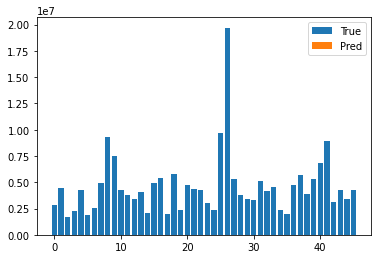

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()

In [ ]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


In [ ]:
model = Sequential()
#model.add(Dense(16384, activation='relu', input_shape=(X_train.shape[1],)))
#model.add(Dense(8192, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(4096, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))


In [ ]:
print(model.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              167936    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=2)

Epoch 1/20
3/3 - 1s - loss: 22927051325440.0000 - mae: 4255850.0000 - val_loss: 31622371999744.0000 - val_mae: 4813670.5000
Epoch 2/20
3/3 - 0s - loss: 22926761918464.0000 - mae: 4255815.0000 - val_loss: 31620100784128.0000 - val_mae: 4813442.5000
Epoch 3/20
3/3 - 0s - loss: 22923842682880.0000 - mae: 4255490.5000 - val_loss: 31607050207232.0000 - val_mae: 4812110.5000
Epoch 4/20
3/3 - 0s - loss: 22910186029056.0000 - mae: 4253803.5000 - val_loss: 31548428517376.0000 - val_mae: 4806071.0000
Epoch 5/20
3/3 - 0s - loss: 22848559120384.0000 - mae: 4246497.0000 - val_loss: 31336794423296.0000 - val_mae: 4783893.5000
Epoch 6/20
3/3 - 0s - loss: 22647024910336.0000 - mae: 4221646.0000 - val_loss: 30677630189568.0000 - val_mae: 4713096.0000
Epoch 7/20
3/3 - 0s - loss: 22009819955200.0000 - mae: 4145923.5000 - val_loss: 28904540602368.0000 - val_mae: 4514161.5000
Epoch 8/20
3/3 - 0s - loss: 20353229258752.0000 - mae: 3936524.5000 - val_loss: 24743524696064.0000 - val_mae: 3993987.7500
Epoch 9/

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4096)              167936    
_________________________________________________________________
dense_1 (Dense)              (None, 2048)              8390656   
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_3 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8

In [ ]:
pred = model.predict(X_test)

In [ ]:
print(pred)

[[2900299. ]
 [3299916.5]
 [2423266.2]
 [3067326.5]
 [3004293.5]
 [3000586. ]
 [8140590. ]
 [6140955. ]
 [4639045. ]
 [4478109. ]
 [3863302.8]
 [3365947. ]
 [2008438.4]
 [7558828.5]
 [3972371.5]
 [6308287. ]
 [5062132. ]
 [3534241.8]
 [3441348.5]
 [4859633.5]
 [2493374. ]
 [3416448.8]
 [3868558.8]
 [4165640. ]
 [4596049.5]
 [4452664. ]
 [4775037. ]
 [5229879. ]
 [6729246. ]
 [3149598. ]
 [2067413.4]
 [3626426.5]
 [3601983.2]
 [3605715.5]
 [4278822. ]
 [2279026. ]
 [3609718. ]
 [3912943. ]
 [1728297.5]
 [2797069.5]
 [5709142. ]
 [4694751. ]
 [2202289.2]
 [5543531. ]
 [4549388.5]
 [3315778. ]]


In [ ]:
y_test = y_test.reset_index(drop=True)

In [ ]:
print("Предсказанный доход:", pred[12][0], ", правильный доход:", y_test[12])

Предсказанный доход: 2008438.4 , правильный доход: 3452382.0


In [ ]:
vec = np.array([])
for i in np.arange(0, len(pred)):
  vec = np.append(vec, pred[i][0])
vec  

array([2900299.   , 3299916.5  , 2423266.25 , 3067326.5  , 3004293.5  ,
       3000586.   , 8140590.   , 6140955.   , 4639045.   , 4478109.   ,
       3863302.75 , 3365947.   , 2008438.375, 7558828.5  , 3972371.5  ,
       6308287.   , 5062132.   , 3534241.75 , 3441348.5  , 4859633.5  ,
       2493374.   , 3416448.75 , 3868558.75 , 4165640.   , 4596049.5  ,
       4452664.   , 4775037.   , 5229879.   , 6729246.   , 3149598.   ,
       2067413.375, 3626426.5  , 3601983.25 , 3605715.5  , 4278822.   ,
       2279026.   , 3609718.   , 3912943.   , 1728297.5  , 2797069.5  ,
       5709142.   , 4694751.   , 2202289.25 , 5543531.   , 4549388.5  ,
       3315778.   ])

In [ ]:
diff = np.array([])

for i in np.arange(0, len(y_test)):
    diff = np.append(diff, np.abs(pred[i][0] - y_test[i]))

In [ ]:
np.sort(diff)[-10:-1]

array([2469099.5, 2489142.5, 2984111. , 3016983. , 3506095.5, 4209333. ,
       4623709. , 5199686. , 5589338. ])

In [ ]:
vec

array([2900299.   , 3299916.5  , 2423266.25 , 3067326.5  , 3004293.5  ,
       3000586.   , 8140590.   , 6140955.   , 4639045.   , 4478109.   ,
       3863302.75 , 3365947.   , 2008438.375, 7558828.5  , 3972371.5  ,
       6308287.   , 5062132.   , 3534241.75 , 3441348.5  , 4859633.5  ,
       2493374.   , 3416448.75 , 3868558.75 , 4165640.   , 4596049.5  ,
       4452664.   , 4775037.   , 5229879.   , 6729246.   , 3149598.   ,
       2067413.375, 3626426.5  , 3601983.25 , 3605715.5  , 4278822.   ,
       2279026.   , 3609718.   , 3912943.   , 1728297.5  , 2797069.5  ,
       5709142.   , 4694751.   , 2202289.25 , 5543531.   , 4549388.5  ,
       3315778.   ])

In [ ]:
sorted = np.sort(pred, )
sorted

array([[2900299. ],
       [3299916.5],
       [2423266.2],
       [3067326.5],
       [3004293.5],
       [3000586. ],
       [8140590. ],
       [6140955. ],
       [4639045. ],
       [4478109. ],
       [3863302.8],
       [3365947. ],
       [2008438.4],
       [7558828.5],
       [3972371.5],
       [6308287. ],
       [5062132. ],
       [3534241.8],
       [3441348.5],
       [4859633.5],
       [2493374. ],
       [3416448.8],
       [3868558.8],
       [4165640. ],
       [4596049.5],
       [4452664. ],
       [4775037. ],
       [5229879. ],
       [6729246. ],
       [3149598. ],
       [2067413.4],
       [3626426.5],
       [3601983.2],
       [3605715.5],
       [4278822. ],
       [2279026. ],
       [3609718. ],
       [3912943. ],
       [1728297.5],
       [2797069.5],
       [5709142. ],
       [4694751. ],
       [2202289.2],
       [5543531. ],
       [4549388.5],
       [3315778. ]], dtype=float32)

In [ ]:
for i in np.arange(0, len(y_test)):
    print("Предсказанный доход:", pred[i][0], ", правильный доход:", y_test[i], 'разница: ', np.abs(pred[i][0] - y_test[i]))

Предсказанный доход: 2900299.0 , правильный доход: 2792031.0 разница:  108268.0
Предсказанный доход: 3299916.5 , правильный доход: 4467728.0 разница:  1167811.5
Предсказанный доход: 2423266.2 , правильный доход: 1734634.0 разница:  688632.25
Предсказанный доход: 3067326.5 , правильный доход: 2267425.0 разница:  799901.5
Предсказанный доход: 3004293.5 , правильный доход: 4263629.0 разница:  1259335.5
Предсказанный доход: 3000586.0 , правильный доход: 1882131.0 разница:  1118455.0
Предсказанный доход: 8140590.0 , правильный доход: 2551252.0 разница:  5589338.0
Предсказанный доход: 6140955.0 , правильный доход: 4882985.0 разница:  1257970.0
Предсказанный доход: 4639045.0 , правильный доход: 9262754.0 разница:  4623709.0
Предсказанный доход: 4478109.0 , правильный доход: 7495092.0 разница:  3016983.0
Предсказанный доход: 3863302.8 , правильный доход: 4250553.0 разница:  387250.25
Предсказанный доход: 3365947.0 , правильный доход: 3752885.0 разница:  386938.0
Предсказанный доход: 2008438.4 

In [ ]:
СС_tuner = np.corrcoef(vec, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициаент корреляция с истинными данными: {СС_tuner}')

Коэффициаент корреляция с истинными данными: 0.1966990564736088
